# Mielage Prediction- Regression Analysis 

# Import The Libraries 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns 

# Import Data

In [5]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# Removing Missing Values 

In [11]:
df=df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

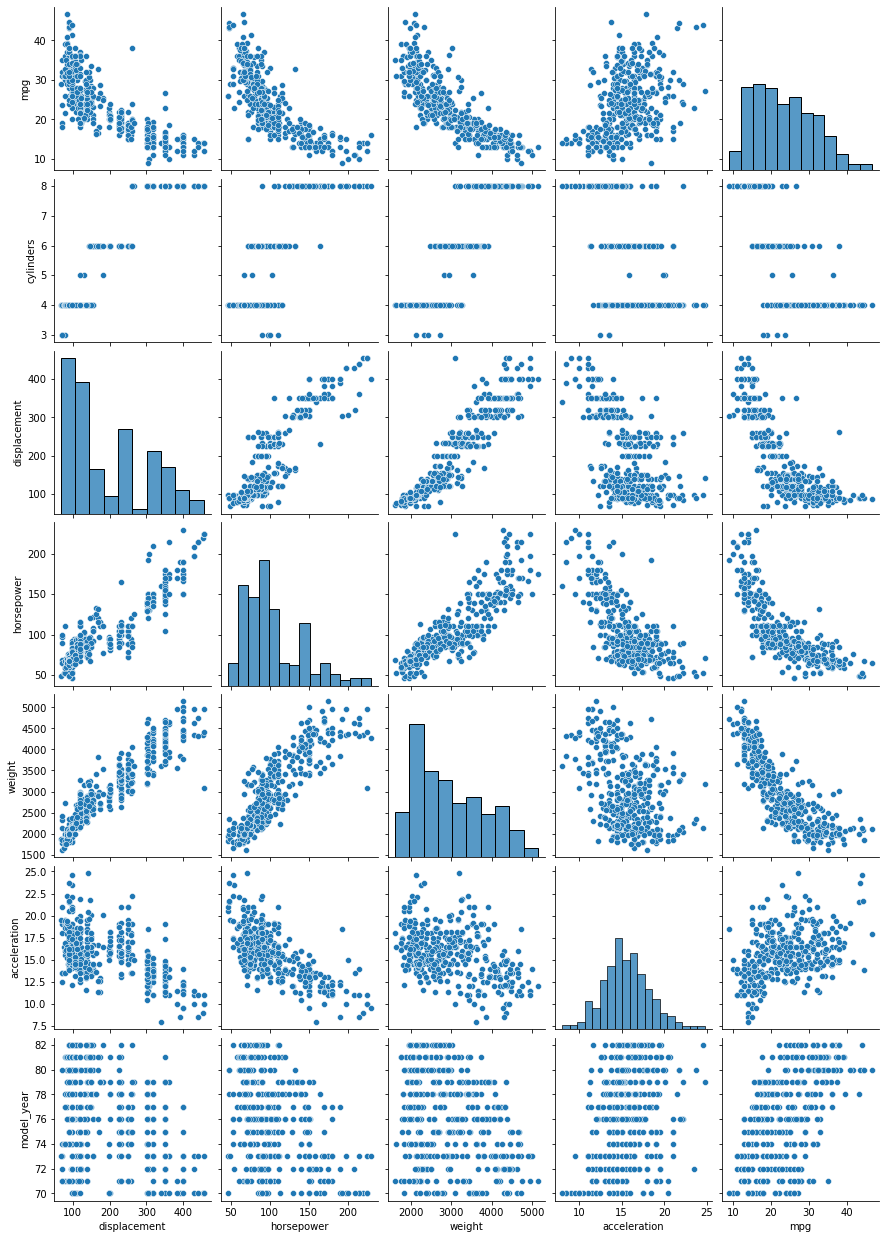

In [13]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'])

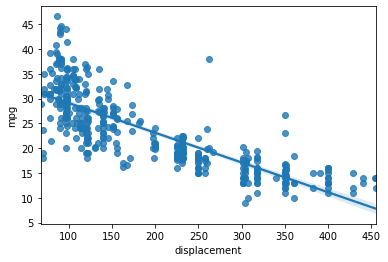

In [14]:
sns.regplot(x='displacement',y='mpg',data=df);

# Define Target Variable y and Feature X

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y=df['mpg']

In [17]:
y.shape

(392,)

In [18]:
X=df[['displacement', 'horsepower', 'weight',
       'acceleration']]

In [19]:
X.shape

(392, 4)

# Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()

In [22]:
X=ss.fit_transform(X)

In [23]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# Train Test Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=192529)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
lr.coef_

array([-0.73968786, -1.55093211, -4.50839935, -0.07836656])

In [31]:
lr.intercept_

23.437146205102994

# Predict Test Data

In [32]:
y_pred=lr.predict(x_test)

In [33]:
y_pred

array([23.45016622, 29.32516033, 29.77228603, 23.0718391 , 32.3593637 ,
       25.24968985, 20.74034177, 26.54954947, 17.17025746, 31.92262642,
       30.88896413, 26.1449333 , 19.87230263, 18.77607948, 24.4247408 ,
       25.84355402, 22.64405946, 30.33855651, 31.12842135, 18.21211578,
       20.0903295 , 23.5039348 , 28.25298432, 25.90374372, 23.65486026,
       23.32273141, 27.57934061, 16.50497922, 29.42111318, 16.15350044,
       12.87866486, 20.76943576, 31.1713373 , 29.03441886, 28.19954578,
       21.05677145, 26.50416653, 22.02322145, 18.91277922, 10.78430644,
       20.20297371, 29.52302663, 31.06050976, 27.28461911, 20.07498761,
       24.78915024, 11.4655348 , 24.17180976, 28.11869358, 24.8907223 ,
       29.63735313, 31.15887854, 15.0755352 , 24.06343493, 19.91348514,
        6.37144488, 30.06899066, 32.58758114, 10.46945996, 31.96229942,
       25.46524252, 29.50943062, 18.31291563, 31.25008487, 31.79137899,
       22.76114005, 20.7482228 , 29.26156892, 29.59453294, 25.85

# Model Accuracy 

In [34]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [35]:
mean_absolute_error(y_test,y_pred)

3.368082071851848

In [36]:
mean_absolute_percentage_error(y_test,y_pred)

0.14857064524172606

In [37]:
 r2_score(y_test,y_pred)

0.6746183746742351

# Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [40]:
x_train2=poly.fit_transform(x_train)

In [41]:
x_test2=poly.fit_transform(x_test)

In [42]:
lr.fit(x_train2,y_train)

LinearRegression()

In [43]:
lr.intercept_

21.08055498586241

In [44]:
lr.coef_

array([-2.26443627, -5.28629942, -1.71359608, -0.97338264,  1.39235317,
        0.51468277, -0.31837587,  0.7039444 , -0.38374565,  1.05229343])

In [45]:
y_pred_poly=lr.predict(x_test2)

# Model Accuracy 

In [46]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [47]:
mean_absolute_error(y_test,y_pred_poly)

2.9662517924643135

In [48]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12250840631913973

In [49]:
r2_score(y_test,y_pred_poly)

0.7285497368611851

# Classification Analysis

# Import Libraries

In [50]:
import pandas as pd

In [51]:
import numpy as np

In [52]:
import matplotlib.pyplot as plt

# Import Data

In [53]:
from sklearn.datasets import load_digits

In [54]:
df=load_digits()

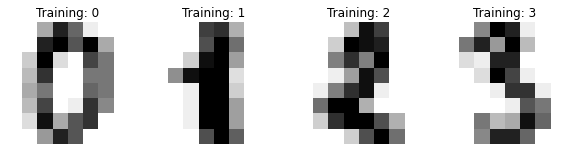

In [55]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title("Training: %i" % label)

# Data Preprocessing 

In [56]:
df.images.shape

(1797, 8, 8)

In [57]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [58]:
df.images[0].shape

(8, 8)

In [59]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [60]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [61]:
data[0].shape

(64,)

# Scaling Data

In [62]:
data.min()

0.0

In [63]:
data.max()

16.0

In [64]:
data=data/16

In [65]:
data.min()

0.0

In [66]:
data.max()

1.0

In [67]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,train_size=0.7,random_state=2529)

In [70]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model 

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier()

In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [74]:
y_pred=rf.predict(x_test)

In [75]:
y_pred

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 5, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 4, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 5, 2, 5, 6, 8, 5, 7, 1, 1, 1, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 3, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 7, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 1, 6, 7, 9, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 9, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 8, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

# Model Accuracy 

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  5,  0,  1,  0,  0,  0,  0, 47,  0],
       [ 0,  0,  0,  2,  0,  2,  0,  2,  0, 47]], dtype=int64)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.94      0.96      0.95        52
           4       0.96      0.98      0.97        54
           5       0.93      0.97      0.95        58
           6       1.00      0.94      0.97        52
           7       0.93      1.00      0.96        50
           8       0.98      0.89      0.93        53
           9       1.00      0.89      0.94        53

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

